## Importing all the useful packages for this project

In [319]:
#Importing Linear Regression
from sklearn.linear_model import LinearRegression

In [320]:
# we will need numpy and pandas
import numpy as np
import pandas as pd

In [321]:
# Importing the required packages and libraries
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
# regression score function.
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import normalize, scale
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

## Reading the Dataset file for the housing data

In [5]:
# "read_csv" is a pandas function to read csv files from web or local device:
house_sales= pd.read_csv('C:/Users/bhupen/Desktop/kc_house_data.csv')

In [268]:
#seeing how the data looks like
house_sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,0,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,0,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,0,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,0,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,0,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# checking the dataset by printing every 1500 lines:
house_sales[::1500]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1500,4324200060,20150312T000000,249000.0,3,1.50,1700,8247,1.0,0,0,...,7,1010,690,1970,0,98031,47.4216,-122.174,1440,8400
3000,8732040090,20150506T000000,307450.0,4,2.75,2690,8874,1.0,0,0,...,8,1370,1320,1980,0,98023,47.3078,-122.383,1990,7875
4500,6072400820,20140926T000000,525000.0,3,1.75,1520,7875,1.0,0,0,...,8,1520,0,1969,0,98006,47.5569,-122.176,2150,9428
6000,8910500675,20140519T000000,461000.0,2,1.00,1060,7193,1.0,0,0,...,7,1060,0,1926,0,98133,47.7102,-122.356,1980,7560
7500,1133000144,20150212T000000,614905.0,3,2.50,2410,7225,2.0,0,0,...,8,2410,0,1991,0,98125,47.7211,-122.310,1940,8347
9000,6742700210,20141119T000000,1050000.0,3,3.00,3490,4500,2.5,0,0,...,9,3170,320,1924,0,98102,47.6394,-122.321,2840,4050
10500,7202350310,20141028T000000,476000.0,3,2.25,1630,3070,2.0,0,0,...,7,1630,0,2004,0,98053,47.6785,-122.030,1690,3200
12000,7851990240,20140717T000000,771150.0,4,3.50,3950,12320,2.0,0,0,...,10,3950,0,2001,0,98065,47.5414,-121.869,3920,11086
13500,8835200610,20141028T000000,372000.0,3,2.50,1710,5633,2.0,0,0,...,7,1710,0,1981,0,98034,47.7232,-122.161,1540,5000


In [8]:
# Checking the datatypes of every feature in the dataset
print(house_sales.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [9]:
# using describe function
house_sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<function seaborn.utils.despine>

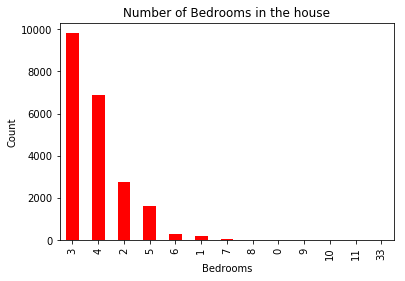

In [10]:
# Counting how many bedrooms are needed for having a common house
house_sales['bedrooms'].value_counts().plot(kind='bar',color="r")
plt.title('Number of Bedrooms in the house')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

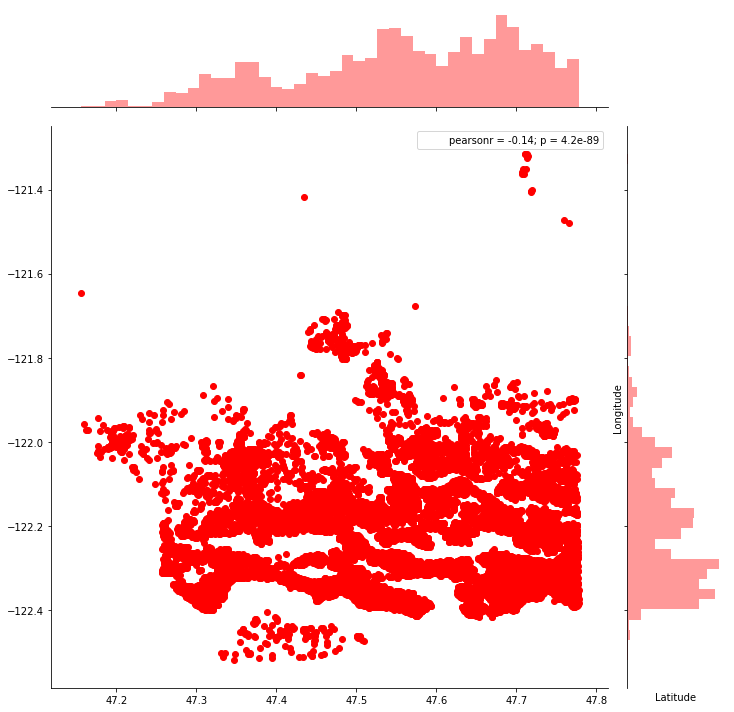

<function seaborn.utils.despine>

In [11]:
# Visualizing the location of the houses based on 'long' and 'lat features in the dataset'
plt.figure()
# Draw a plot of two variables with bivariate and univariate graphs. using sns.jointplot
sns.jointplot(x=house_sales.lat.values, y=house_sales.long.values, size=10,color="r")
#plotting the y-axis label
plt.ylabel('Longitude')
#plotting the x-axis label
plt.xlabel('Latitude')
plt.show()
#Remove the top and right spines from plot(s)
sns.despine



## Factors affecting the price of the house: we are checking by plotting every feature versus price

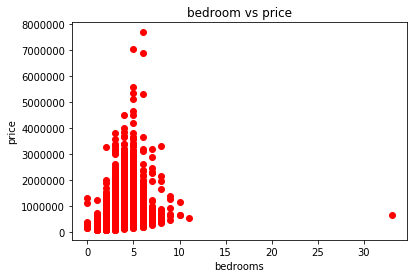

In [12]:
plt.scatter(house_sales.bedrooms,house_sales.price , color='r')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('bedroom vs price')
#By analyzing the graph we can see the 3-5 bedrooms , more the price 

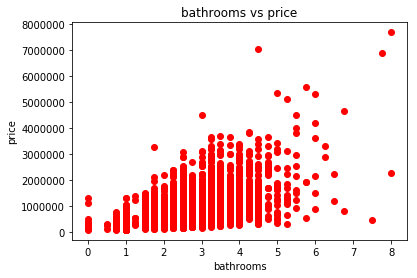

In [13]:
plt.scatter(house_sales.bathrooms,house_sales.price,color='r')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.title('bathrooms vs price')
# more the bathrooms , more the price

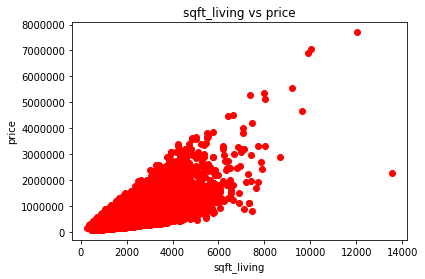

In [14]:
plt.scatter(house_sales.sqft_living,house_sales.price,color='r')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('sqft_living vs price')
# more the living area of the house , more the price

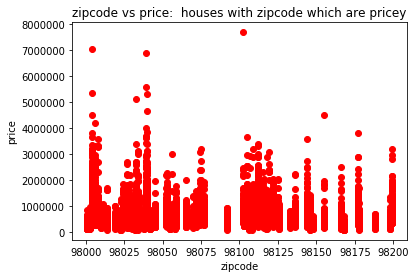

In [15]:
plt.scatter(house_sales.zipcode,house_sales.price,color='r')
plt.xlabel('zipcode')
plt.ylabel('price')
plt.title('zipcode vs price:  houses with zipcode which are pricey')
#98000 and 98035 zipcodes are having pricey houses

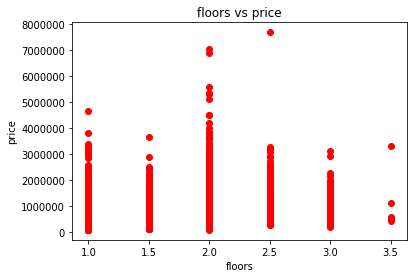

In [16]:
plt.scatter(house_sales.floors,house_sales.price,color='r')
plt.xlabel('floors')
plt.ylabel('price')
plt.title('floors vs price')
#  houses with 2 floors , more the price

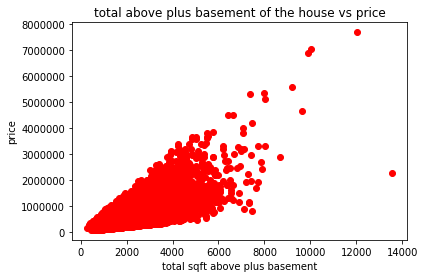

In [17]:
plt.scatter(house_sales.sqft_above+house_sales.sqft_basement,house_sales.price,color='r')
plt.xlabel('total sqft above plus basement')
plt.ylabel('price')
plt.title('total above plus basement of the house vs price')
# more the total  , more the price

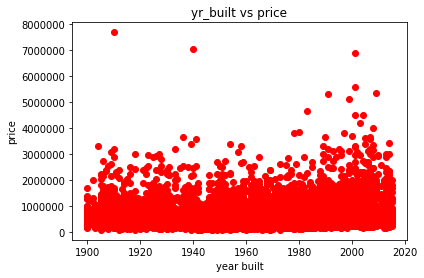

In [18]:
plt.scatter(house_sales.yr_built,house_sales.price,color='r')
plt.xlabel('year built')
plt.ylabel('price')
plt.title('yr_built vs price')
# if the buliding is new , more the price

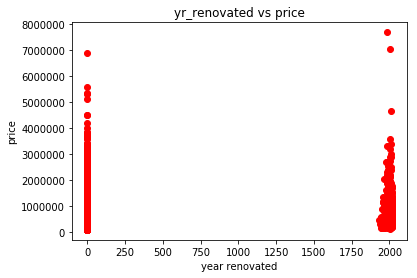

In [19]:
plt.scatter(house_sales.yr_renovated,house_sales.price,color='r')
plt.xlabel('year renovated')
plt.ylabel('price')
plt.title('yr_renovated vs price')
# if the year of renovation is new   , more the price

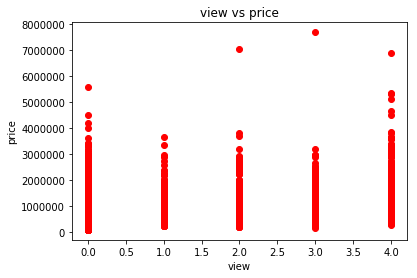

In [20]:
plt.scatter(house_sales.view,house_sales.price,color='r')
plt.xlabel('view')
plt.ylabel('price')
plt.title('view vs price')
# the house with 4 views  , more the price


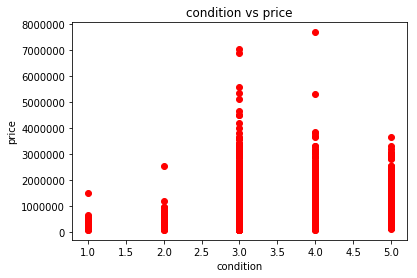

In [21]:
plt.scatter(house_sales.condition,house_sales.price,color='r')
plt.xlabel('condition')
plt.ylabel('price')
plt.title('condition vs price')

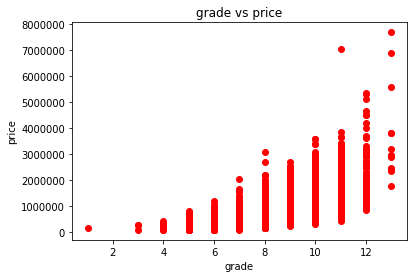

In [22]:
plt.scatter(house_sales.grade,house_sales.price,color='r')
plt.xlabel('grade')
plt.ylabel('price')
plt.title('grade vs price')
#more the grade , more the price

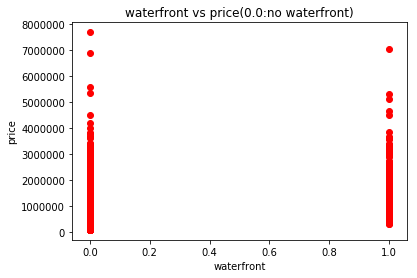

In [23]:
plt.scatter(house_sales.waterfront,house_sales.price,color='r')
plt.xlabel('waterfront')
plt.ylabel('price')
plt.title('waterfront vs price(0.0:no waterfront)')
#more the grade , more the price

# Various Regression Techniques Used to predict which model is the best for predicting the house sales price

# Using Linear Regression model

In [209]:
#initialize Linear Regression to a variable my_linearReg
my_linearReg=LinearRegression()

In [334]:
#Target
y = house_sales['price']
#converting dates to 1’s and 0’s & 0 : houses which are new that is built after 2014.
date_conversion = [1 if values == 2014 else 0 for values in house_sales.date ]
house_sales['date'] = date_conversion
X = house_sales.drop(['id', 'price'],axis=1)

In [335]:
X.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [336]:
scaled_df = scale(X)

#normalize the data 
#x = X.values
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#scaled_df = pd.DataFrame(x_scaled,)

In [337]:
#Splitting the training and testing dataset
X_train , X_test , y_train , y_test = train_test_split( scaled_df, y , test_size = 0.1,random_state =2)

In [338]:
#Training the dataset
my_linearReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Finding accuracy for the dataset ::

In [371]:
linear_regression=my_linearReg.score(X_test,y_test)
print('Accuracy :',linear_regression*100 , '%')

Accuracy : 73.2033187989 %


### The score of our data ie , prediction. in this case the prediction is 73% approx.

In [290]:
house=house_sales["price"].mean()
print(house)

540088.1417665294


In [361]:
# predicting the house prices 
predict = my_linearReg.predict(X_test)
print('House prices',predict)
#Finding MSE,RMSE,FIT
mean_sqr = metrics.mean_squared_error(y_test, predict)
rmse = np.sqrt(mean_sqr)
print('Root Mean Square Error is =',rmse)
print('Fit :' , (rmse/house)*100 ,'%')


House prices [  708993.40313845  1453953.40313845   422597.40313845 ...,
   191501.40313845   238149.40313845   451218.40313845]
Root Mean Square Error is = 197880.639196
Fit : 36.6385824634 %


# Decision Tree Regression 

In [257]:
from sklearn.tree import DecisionTreeRegressor


In [293]:
#Initializing Decision Tree Regressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
dtree_predict = decision_tree.predict(X_test)
print('House prices',dtree_predict)
dtree_acc = r2_score(y_test, dtree_predict)
print('Accuracy :',dtree_acc*100 , '%')


House prices [ 1001000.   810000.   409950. ...,   280000.   280000.   615000.]
Accuracy : 79.7912651654 %


### The score of our data ie , prediction. in this case the prediction is 80% approx.

In [273]:
# Finding the Root mean square error  and percentage fit
mse = mean_squared_error(y_test, decision_tree.predict(X_test))
print("MSE: %.4f" % mse)
rmse = np.sqrt(mse)
print('Root Mean Square Error is =',rmse)
print('Fit :' , (rmse/house)*100 ,'%')

MSE: 31246699898.3242
Root Mean Square Error is = 176767.360953
Fit : 32.7293542078 %


# Ridge Regression

In [328]:
#Importing Ridge library from sklearn.linear_model
from sklearn.linear_model import Ridge
#Initializing the ridge regression
model = Ridge(alpha=0.1, normalize=True)
#Training the dataset
model.fit(X_train, y_train)
model_predict=model.predict(X_test)
print('Housing prices',model_predict)
#testing the dataset and predicting the accuracy
model_accuracy=model.score(X_test, y_test)
print('Accuracy :',model_accuracy*100 , '%')

Housing prices [  691531.0682953   1403608.01466767   405191.66849196 ...,
   194874.87115041   274320.67178527   459620.30254397]
Accuracy : 72.7476202187 %


### The score of our data ie , prediction. in this case the prediction is 73% approx.

In [296]:
# Finding the Root mean square error  and percentage fit for the model by diving the RMSE AND AVERAGE PRICE
mse = mean_squared_error(y_test, model_predict)
print("MSE: %.4f" % mse)
rmse = np.sqrt(mse)
print('Root Mean Square Error is =',rmse)
print('Fit :' , (rmse/house)*100 ,'%')

MSE: 39822638567.8392
Root Mean Square Error is = 199556.10381
Fit : 36.9488030523 %


# Lasso Regression

In [311]:
#Import Lasso Library from sklearn.linear_model
from sklearn.linear_model import Lasso
#Initialize the lasso regression
Lasso_Regression = Lasso(alpha=0.1)
#Training the dataset 
Lasso_Regression.fit(X_train, y_train)
#predicting the accuracy
Lasso_Regression.score(X_test, y_test)
#Prediciting the  House Prices
Lasso_Regression_predict=Lasso_Regression.predict(X_test)
print('Housing prices',Lasso_Regression_predict)
#predicting the accuracy
predict_Lasso_Regression=Lasso_Regression.score(X_test, y_test)
print('Accuracy :',predict_Lasso_Regression*100 , '%')

Housing prices [  708968.59709877  1454115.09345619   422619.95370772 ...,
   191421.37108542   238056.2609838    451234.81619456]
Accuracy : 73.2034234373 %


C:\Users\bhupen\Anaconda34\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### The score of our data ie , prediction. in this case the prediction is 73% approx.

In [312]:
# Finding the Root mean square error  and percentage fit
mse = mean_squared_error(y_test,Lasso_Regression_predict)
print("MSE: %.4f" % mse)
rmse = np.sqrt(mse)
print('Root Mean Square Error is =',rmse)
print('Fit :' , (rmse/house)*100 ,'%')

MSE: 39156594465.3736
Root Mean Square Error is = 197880.252843
Fit : 36.6385109283 %


# Random Forest Regression

In [299]:
from sklearn.ensemble import RandomForestRegressor
# adjusting parameters:
my_RandomForest = RandomForestRegressor(n_estimators = 19, bootstrap = True, random_state=2)
#Training the dataset
my_RandomForest.set_params(n_jobs=-1).fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=-1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [313]:
#Testing the dataset and predicting the house prices
predicted = my_RandomForest.predict(X_test)
print('Housing prices',predicted)
my_RandomForest1 =r2_score(y_test,predicted)
print('Accuracy :',my_RandomForest1*100 , '%')

Housing prices [  693894.73684211  1644263.15789474   507250.         ...,
   259538.10526316   288339.47368421   545944.73684211]
Accuracy : 89.3437462529 %


### The score of our data ie , prediction. in this case the prediction is 89% approx.

In [266]:
# Finding the Root mean square error  and percentage fit
mse = mean_squared_error(y_test, my_RandomForest.predict(X_test))
print("MSE: %.4f" % mse)
rmse = np.sqrt(mse)
print('Root Mean Square Error is =',rmse)
print('Fit :' , (rmse/house)*100 ,'%')

MSE: 15571489347.5307
Root Mean Square Error is = 124785.773819
Fit : 23.1047053562 %


# Gradient Boosting Regression  model

In [243]:
# importing ensemble for Gradient Boosting Regression
from sklearn import ensemble

In [244]:
#Initializing the gradient boosting regressor
GB_Regression = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [245]:
#Training the dataset
GB_Regression.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

## Finding accuracy for the dataset ::

In [246]:
gradient_boosting=GB_Regression.score(X_test,y_test)
print('Accuracy :-',gradient_boosting*100 , '%')

Accuracy :- 91.9276976929 %


### The score of our data ie , prediction. in this case the prediction is 92% approx.

### prediciting the house prices 

In [306]:
predict_GB_regression = GB_Regression.predict(X_test)
print('Housing prices',predict_GB_regression)

Housing prices [  717843.17395523  1302577.03508955   442234.38461731 ...,
   248696.1407405    254873.95874779   521834.99188423]


In [307]:
# Finding the Root mean square error  and percentage fit
mse = mean_squared_error(y_test, predict_GB_regression)
print("MSE: %.4f" % mse)
rmse = np.sqrt(mse)
print('Root Mean Square Error is =',rmse)
print('Fit :-' , (rmse/house)*100 ,'%')

MSE: 11795680955.7162
Root Mean Square Error is = 108607.92308
Fit :- 20.1092959984 %


## Therefore , Gradient Boosting Regression is the Best Model for predicting the house prices